In [53]:
import os
import pandas as pd

In [54]:
# Load Data
datapath = '../csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
    
df = pd.read_csv(datapath)
del df['Lat']
del df['Long']
df= df.replace('Mainland China','China')
df=df.groupby('Country/Region').sum()

last_date = list(df.columns)[-1]

df = df[df[last_date]>1000]



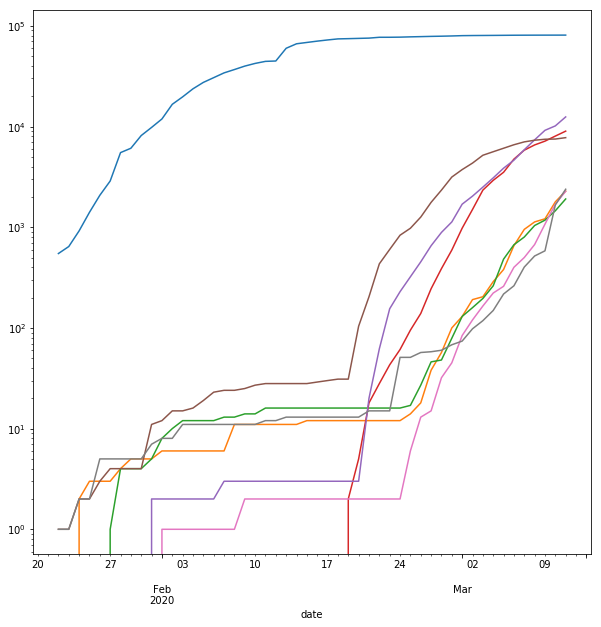

In [55]:
df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

del df.index.name
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)


%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 10]

ax=df.plot(logy=True, legend=False) #list(df.columns))


In [56]:
# Shift all the series
df.columns = [c[1] for c in df.columns]

#del df['Others']

#df['China']=df['China']+df['Mainland China']
#del df['Mainland China']


for c in df.columns:
    for i,a in enumerate(df[c]):        
        if a>=100:
            df[c]=df[c].shift(-i)            
            break
df=df.reset_index(drop=True)
df

,China,France,Germany,Iran,Italy,"Korea, South",Spain,US
0,548,100.0,130.0,139.0,155.0,104.0,120.0,118.0
1,643,130.0,159.0,245.0,229.0,204.0,165.0,149.0
2,920,191.0,196.0,388.0,322.0,433.0,222.0,217.0
3,1406,204.0,262.0,593.0,453.0,602.0,259.0,262.0
4,2075,288.0,482.0,978.0,655.0,833.0,400.0,402.0
5,2877,380.0,670.0,1501.0,888.0,977.0,500.0,518.0
6,5509,656.0,799.0,2336.0,1128.0,1261.0,673.0,583.0
7,6087,952.0,1040.0,2922.0,1694.0,1766.0,1073.0,1665.0
8,8141,1129.0,1176.0,3513.0,2036.0,2337.0,1695.0,2384.0
9,9802,1212.0,1457.0,4747.0,2502.0,3150.0,2277.0,NaN


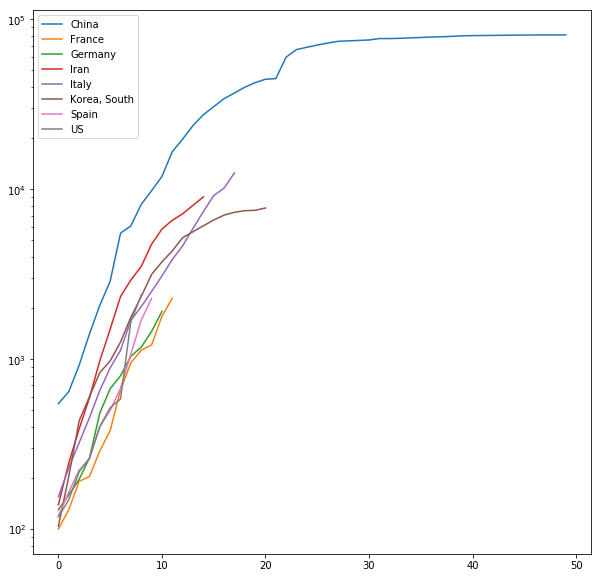

In [57]:

fig, ax = plt.subplots()
df.plot(logy=True, ax=ax) #, ax=ax)
